
Aperçu des données:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB

Statistiques descriptives:
       total_bill         tip        size
count  244.000000 

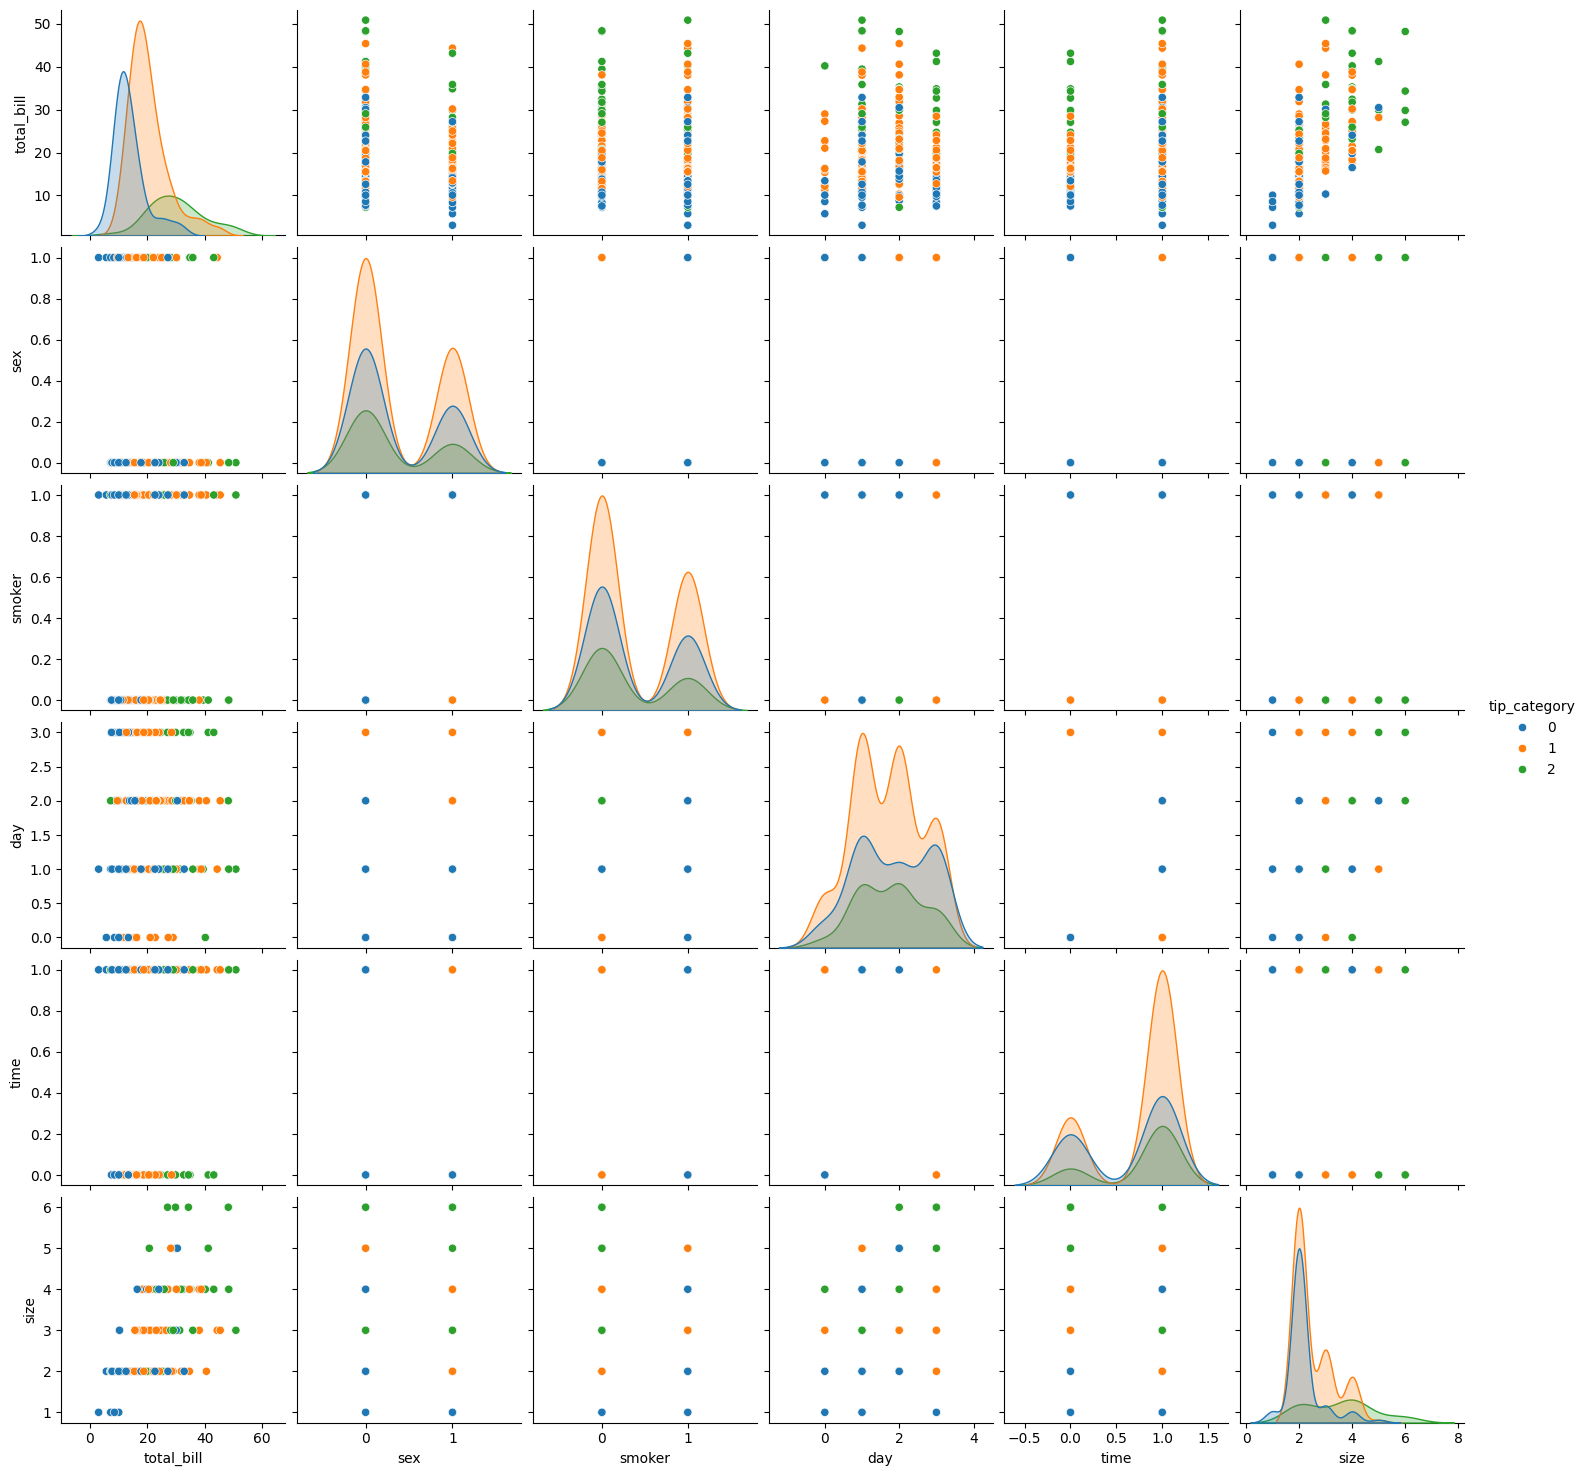

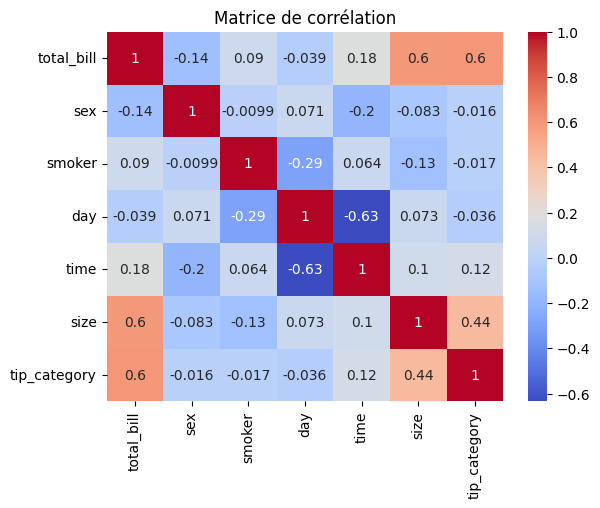

Best Model: Support Vector Classifier
                           Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.698630   0.696999  0.698630  0.695479
Decision Tree              0.534247   0.545170  0.534247  0.537763
Random Forest              0.616438   0.643414  0.616438  0.624145
Support Vector Classifier  0.712329   0.716717  0.712329  0.709254
KNN Classifier             0.698630   0.699864  0.698630  0.699092


In [1]:
# Machine Learning Project - Classification Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Dataset Selection and Import
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Data Overview
print("\nAperçu des données:")
print(df.head())
print("\nInformations sur les données:")
df.info()
print("\nStatistiques descriptives:")
print(df.describe())

# Step 2: Data Cleaning and Preparation
print("\nVérification des valeurs manquantes:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

# Transformation de la variable cible 'tip' en variable catégorielle
df['tip_category'] = pd.cut(df['tip'], bins=[0, 2, 4, np.inf], labels=[0, 1, 2])
df.drop('tip', axis=1, inplace=True)

# Visualization and Exploration
sns.pairplot(df, hue='tip_category')
plt.show()
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

# Step 3: Feature Selection
X = df.drop('tip_category', axis=1)
y = df['tip_category']

# Step 4: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'KNN Classifier': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}

results_df = pd.DataFrame(results).T
best_model_name = results_df['F1-Score'].idxmax()
best_model = models[best_model_name]
joblib.dump(best_model, 'best_classification_model.pkl')

print("Best Model:", best_model_name)
print(results_df)
